In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/911 (2).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [ ]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [ ]:
df['title'].nunique()

110

In [ ]:
df['reasson'] = df['title'].apply(lambda title : title.split(':')[0])

In [ ]:
df['reasson'].value_counts()

reasson
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='reasson', ylabel='count'>

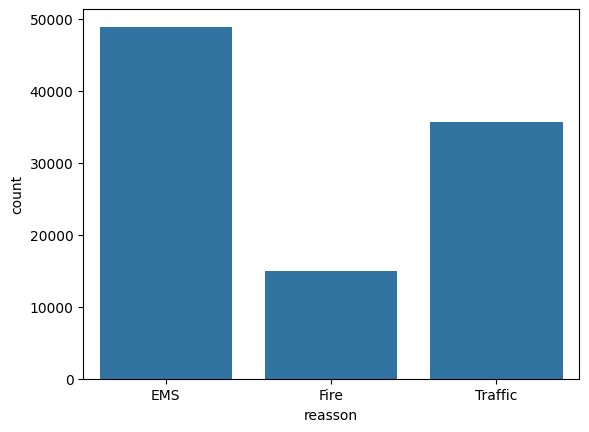

In [ ]:
sns.countplot(x='reasson' ,data = df)

In [ ]:
type(df['timeStamp'][0])

str

In [ ]:
dummy = df['timeStamp'][0]

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df['hour']= df['timeStamp'].apply(lambda x:x.hour)

In [ ]:
df.hour

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

In [ ]:
df['month']= df['timeStamp'].apply(lambda x:x.month)

In [ ]:
df.d

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: month, Length: 99492, dtype: int64

In [ ]:
df['Date']= df['timeStamp'].apply(lambda x:x.date())

In [ ]:
df.Date

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [ ]:
df['DayofWeek']= df['timeStamp'].apply(lambda x:x.dayofweek)

In [ ]:
df.DayofWeek.map(dmap)

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayofWeek, Length: 99492, dtype: object

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)

<Axes: xlabel='DayofWeek', ylabel='count'>

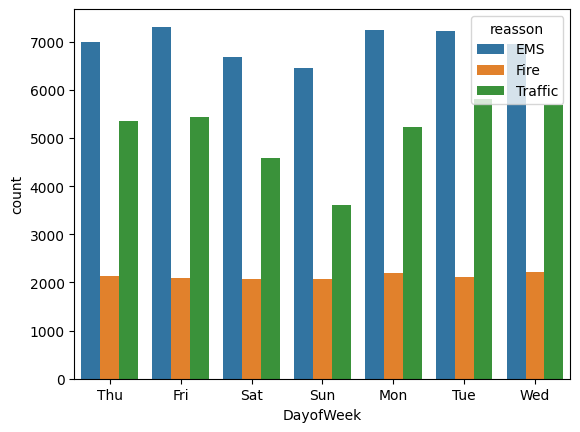

In [ ]:
sns.countplot(x= 'DayofWeek' ,hue = 'reasson' ,data=df)

<Axes: xlabel='month', ylabel='count'>

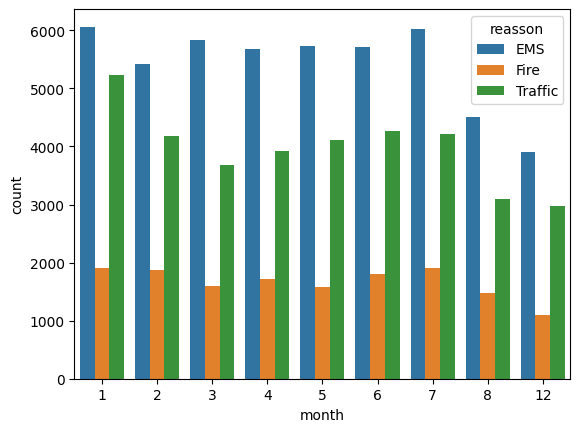

In [ ]:
sns.countplot(x= 'month' ,hue = 'reasson' ,data=df)

In [ ]:
#from itertools import groupby

In [ ]:
bymonth = df.groupby('month').count()

In [ ]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasson,hour,DayofWeek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month'>

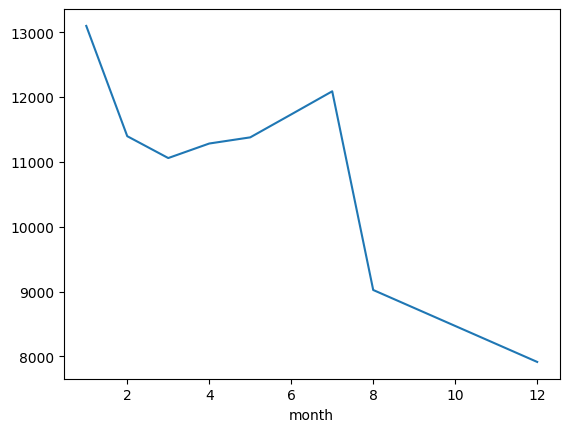

In [ ]:
bymonth['addr'].plot()

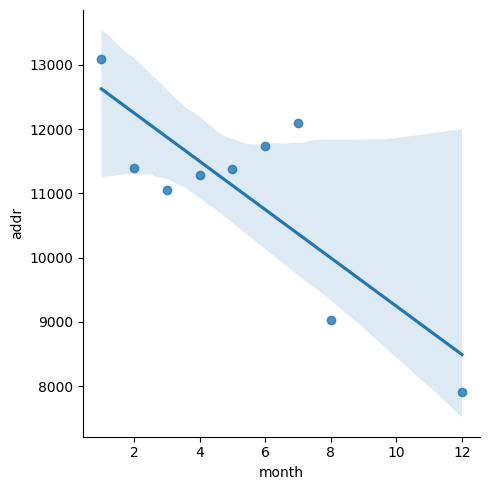

In [ ]:
sns.lmplot(x='month',y='addr',data=bymonth.reset_index())

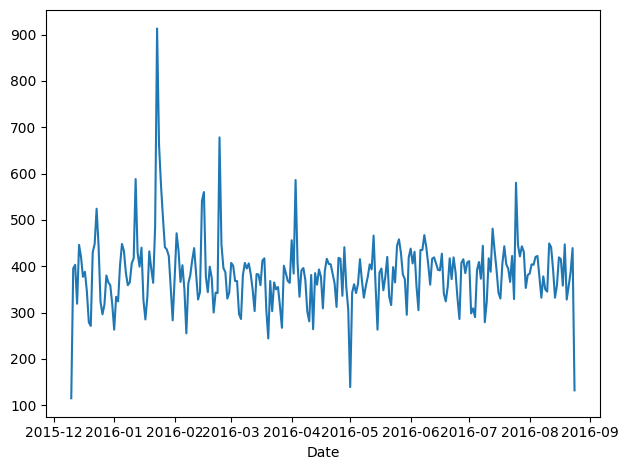

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

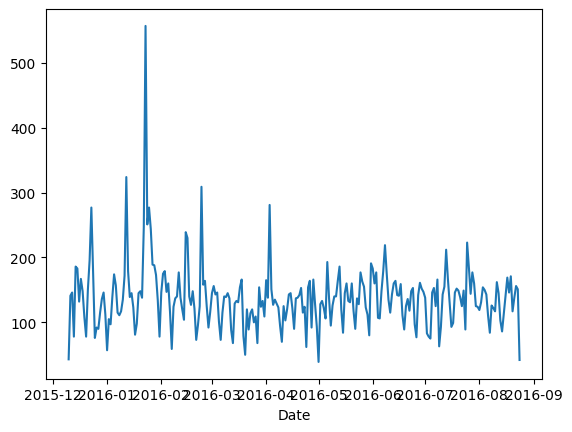

In [ ]:
df[df['reasson']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

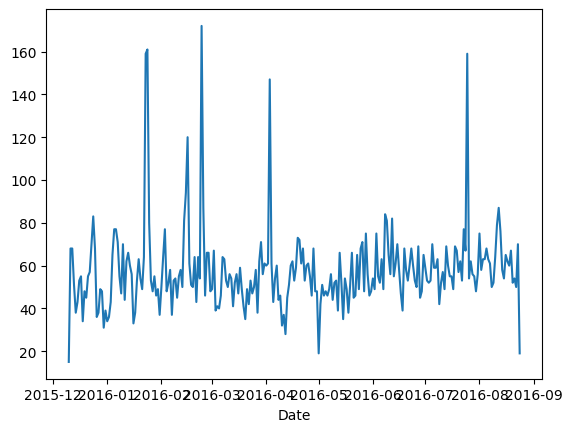

In [ ]:
df[df['reasson']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

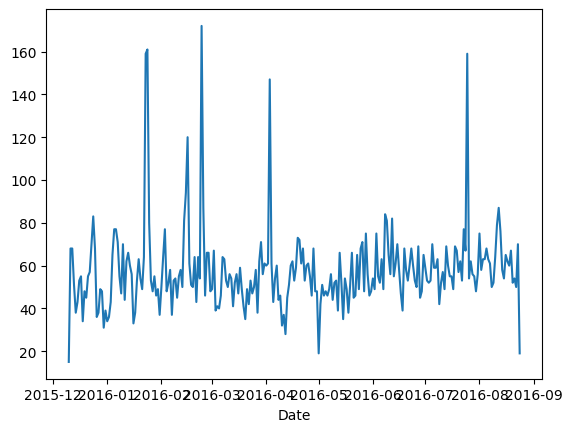

In [ ]:
df[df['reasson']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

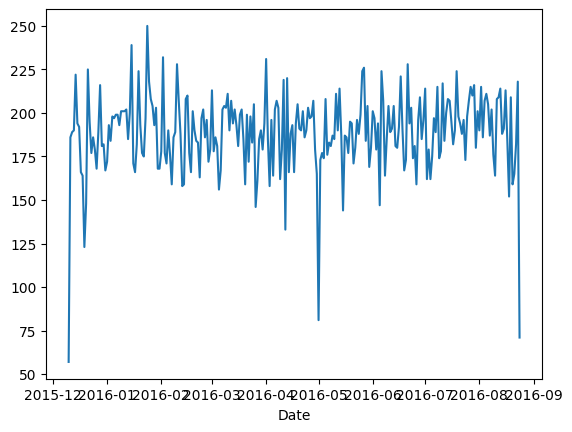

In [ ]:
df[df['reasson']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout